In [1]:
import numpy as np
from sympy import *
from scipy.stats import *
import pandas as pd

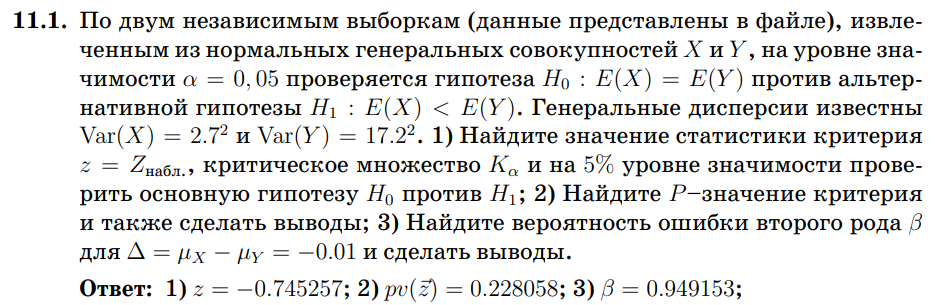

In [33]:
data = pd.read_csv('sample_11_1_XY.csv', delimiter=';', decimal=',', header=None)
sgmx = 2.7
sgmy = 17.2
alpha = 0.05
delta = -0.01

In [56]:
# H1: mx < my
def Z_test_two_sample_K2(data, alpha, sgmx, sgmy, delta):
    xvec = data[0].loc[pd.notnull(data[0])]
    yvec = data[1].loc[pd.notnull(data[1])]
    n = len(xvec)
    m = len(yvec)
    xm, ym = xvec.mean(), yvec.mean()
    
    Z_st = (xm - ym)/(sgmx**2/n + sgmy**2/m)**.5
    pv = norm.cdf(Z_st)
    cv = norm.isf(alpha)
    betta = 0.5 + (norm.cdf(cv + (n*m)**.5/(m*sgmx**2+n*sgmy**2)**.5*delta) - 0.5)
    #beta = norm.cdf(cv + (n*m)**.5/(m*sgmx**2+n*sgmy**2)**.5 * delta)
    
    return Z_st, pv, cv, betta

In [57]:
Z_test_two_sample_K2(data, alpha, sgmx, sgmy, delta)

(-0.7452574454846034,
 0.22805805063538087,
 1.6448536269514729,
 0.9491532242583798)

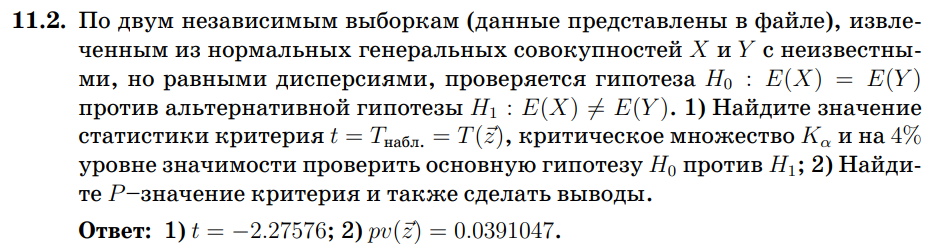

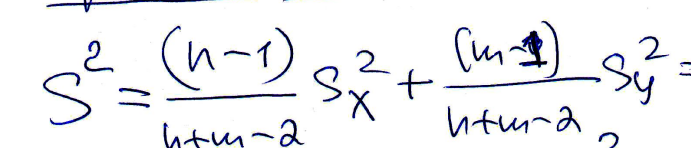

In [58]:
data = pd.read_csv('sample_11_2_XY.csv', delimiter=';', decimal=',', header=None)

In [95]:
def T_test_two_sample(data):
    """дисперсии неизвестны, но равны"""
    """двусторонняя область"""
    xvec = np.array(data[0].loc[pd.notnull(data[0])])
    yvec = np.array(data[1].loc[pd.notnull(data[1])])
    n = len(xvec)
    m = len(yvec)
    xm, ym = xvec.mean(), yvec.mean()
    Sx, Sy = np.var(xvec, ddof=True), np.var(yvec, ddof=True) # они уже в квадрате
    S2 = (n-1)*Sx/(n+m-2) + (m-1)*Sy/(n+m-2) 
     
    T_st = (xm - ym)/(S2**.5*(1/n + 1/m)**.5)
    T = t(n+m-2)
    pv = 2*(1 - t.cdf(abs(T_st), n+m-2))
    #pv2 = 2*min(T.sf(T_st), T.cdf(T_st))
    return T_st, pv

In [96]:
T_test_two_sample(data)

(-2.275759311543327, 0.039104712196067926)

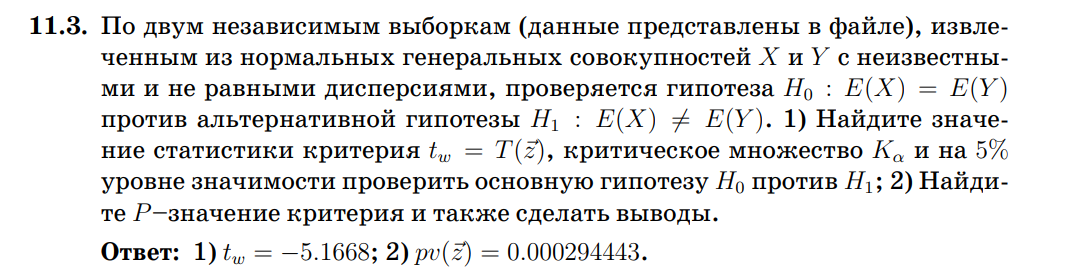

In [134]:
data = pd.read_csv('sample_11_3_XY.csv', delimiter=';', decimal=',', header=None)

In [135]:
def welch_test(data):
    xvec = np.array(data[0].loc[pd.notnull(data[0])])
    yvec = np.array(data[1].loc[pd.notnull(data[1])])
    n = len(xvec)
    m = len(yvec)
    xm, ym = xvec.mean(), yvec.mean()
    Sx, Sy = np.var(xvec, ddof=True), np.var(yvec, ddof=True)
    
    T_w = (xm - ym)/(Sx/n + Sy/m)**.5
    f = (Sx/n + Sy/m)**2/(Sx**2/(n**2*(n-1)) + Sy**2/(m**2*(m-1)))
    T = t(f)
    pv = 2*min(T.cdf(T_w), T.sf(T_w))
    return T_w, pv

In [136]:
welch_test(data)

(-5.166795565736609, 0.00029444309499353444)

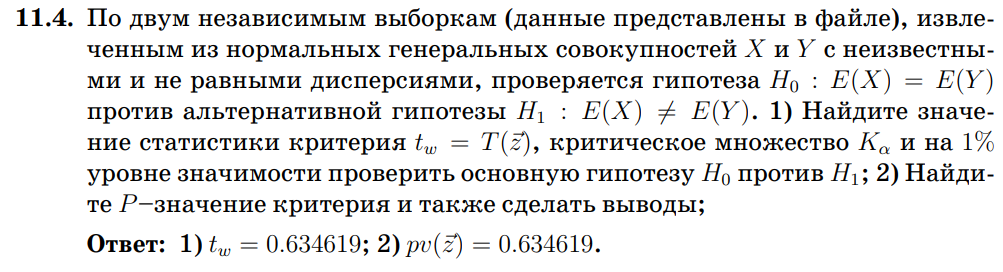

In [137]:
data = pd.read_csv('sample_11_4_XY.csv', delimiter=';', decimal=',', header=None)

In [138]:
welch_test(data)

(0.6346186667119241, 0.532054842325338)

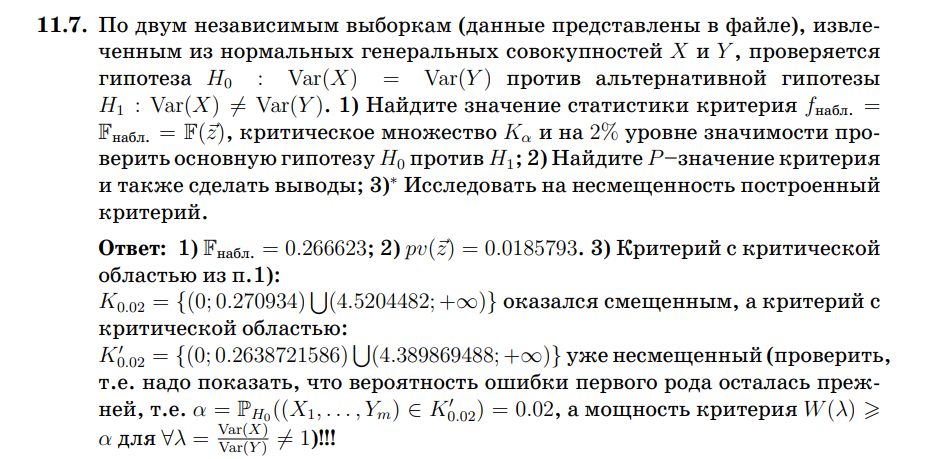

In [139]:
data = pd.read_csv('sample_11_7_XY.csv', delimiter=';', decimal=',', header=None)

In [140]:
welch_test(data)

(5.6027142371010275, 7.466187614438877e-05)

In [167]:
# H0: varx = vary
# H1: varx != vary
def F_test_two_sample(data, alpha):
    xvec = np.array(data[0].loc[pd.notnull(data[0])])
    yvec = np.array(data[1].loc[pd.notnull(data[1])])
    n = len(xvec)
    m = len(yvec)
    Sx, Sy = np.var(xvec, ddof=True), np.var(yvec, ddof=True)
    
    F_st = Sx/Sy
    F = f(n-1, m-1)
    cv1 = F.isf(1-alpha/2)
    cv2 = F.isf(alpha/2)
    pv = 2*min(F.cdf(F_st), F.sf(F_st))
    
    return F_st, cv1,cv2, pv

In [168]:
F_test_two_sample(data, 0.02)

(0.266623095503372, 0.270934321659727, 4.520448216180088, 0.018579250846445097)